---

# Lending Club Case Study


---

## 1. Data Exploration

In [1]:
# Importing the necessary Librarires

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#Reading Data from excel files
df = pd.read_csv('loan.csv', low_memory=False)
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT     24000.0   
1                           Ryder   < 1 year           RENT     30000.0   
2                             NaN  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                         NaN   < 1 year       MORTGAGE    100000.0   
39715                         NaN   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11      Current          n   
...                   ...     ...          ...        ...   
39712        Not Verified  Jul-07   Fully Paid          n   
39713        Not Verified  Jul-07   Fully Paid          n   
39714        Not Verified  Jul-07   Fully Paid          n   
39715        Not Verified  Jul-07   Fully Paid          n   
39716        Not Verified  Jun-07   Fully Paid          n   

                                                     url  \
0      https://lendingclub.com/browse/loanDetail.acti...   
1      https://lendingclub.com/browse/loanDetail.acti...   
2      https://lendingclub.com/browse/loanDetail.acti...   
3      https://lendingclub.com/browse/loanDetail.acti...   
4      https://lendingclub.com/browse/loanDetail.acti...   
...                                                  ...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
0        Borrower added on 

In [2]:
#Understanding the Dataset and Data-types of Variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [3]:
#Understanding the stats of the Dataset
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [4]:
#Understanding the variables/columns

Data_Dictionary = pd.read_excel('Data_Dictionary.xlsx', index_col='LoanStatNew')
Data_Dictionary

Description
LoanStatNew                                                                      
acc_now_delinq                  The number of accounts on which the borrower i...
acc_open_past_24mths                   Number of trades opened in past 24 months.
addr_state                      The state provided by the borrower in the loan...
all_util                                    Balance to credit limit on all trades
annual_inc                      The self-reported annual income provided by th...
annual_inc_joint                The combined self-reported annual income provi...
application_type                Indicates whether the loan is an individual ap...
avg_cur_bal                               Average current balance of all accounts
bc_open_to_buy                          Total open to buy on revolving bankcards.
bc_util                         Ratio of total current balance to high credit/...
chargeoff_within_12_mths                   Number of charge-offs within 12 months
collection_recovery_fee                            post charge off collection fee
collections_12_mths_ex_med      Number of collections in 12 months excluding m...
delinq_2yrs                     The number of 30+ days past-due incidences of ...
delinq_amnt                     The past-due amount owed for the accounts on w...
desc                                    Loan description provided by the borrower
dti                             A ratio calculated using the borrower’s total ...
dti_joint                       A ratio calculated using the co-borrowers' tot...
earliest_cr_line                The month the borrower's earliest reported cre...
emp_length                      Employment length in years. Possible values ar...
emp_title                       The job title supplied by the Borrower when ap...
fico_range_high                 The upper boundary range the borrower’s FICO a...
fico_range_low                  The lower boundary range the borrower’s FICO a...
funded_amnt                     The total amount committed to that loan at tha...
funded_amnt_inv                 The total amount committed by investors for th...
grade                                                      LC assigned loan grade
home_ownership                  The home ownership status provided by the borr...
id                                  A unique LC assigned ID for the loan listing.
il_util                         Ratio of total current balance to high credit/...
initial_list_status             The initial listing status of the loan. Possib...
inq_fi                                       Number of personal finance inquiries
inq_last_12m                         Number of credit inquiries in past 12 months
inq_last_6mths                  The number of inquiries in past 6 months (excl...
installment                     The monthly payment owed by the borrower if th...
int_rate                                                Interest Rate on the loan
issue_d                                       The month which the loan was funded
last_credit_pull_d              The most recent month LC pulled credit for thi...
last_fico_range_high            The upper boundary range the borrower’s last F...
last_fico_range_low             The lower boundary range the borrower’s last F...
last_pymnt_amnt                                Last total payment amount received
last_pymnt_d                                      Last month payment was received
loan_amnt                       The listed amount of the loan applied for by t...
loan_status                                            Current status of the loan
max_bal_bc                      Maximum current balance owed on all revolving ...
member_id                        A unique LC assigned Id for the borrower member.
mo_sin_old_il_acct              Months since oldest bank installment account o...
mo_sin_old_rev_tl_op                 Months since oldest revolving account opened
mo_sin_rcnt_rev_tl_op           Months since most re

## 2. Data Cleanup

In [5]:
#Checking for Empty Columns
df.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit        39717
mo_sin_old_rev_tl_op              39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717
total_bc_limit                    39717
dti_joint                         39717


In [6]:
#Filtering the Data

Empty_Columns=[]
#print("Dropping Columns:\n")
for i in df.columns:
    if df.isnull().sum()[i] >= 30000:
        Empty_Columns.append(i)
        #print(i)
#print("Dropping Columns:\n",Empty_Columns.append(['id','member_id','url']))

df1 = df.drop(Empty_Columns, axis=1) #Removing Empty Columns
df1 = df1.drop(['id','member_id','url'], axis=1) #Removing ID's columns as we use index as unique id's
df1 = df1[df1.loan_status!='Current'] #Removing the samples of Current type in loan status, as we draw conclusions only from Charged off and Fully Paid

#df1

## 3. Feature Selection

In [7]:
#Unique values

c=[]
v=[]
for i in df1.columns:
    c.append(i)
    v.append(df1[i].nunique())
    #print(i,'\t',df1[i].nunique())
NUnique = pd.DataFrame(v,c, columns=['Number_of_Unique_Values']).sort_values(ascending=True, by='Number_of_Unique_Values')
NUnique

Number_of_Unique_Values
tax_liens                                         1
initial_list_status                               1
out_prncp                                         1
out_prncp_inv                                     1
pymnt_plan                                        1
policy_code                                       1
collections_12_mths_ex_med                        1
application_type                                  1
acc_now_delinq                                    1
chargeoff_within_12_mths                          1
delinq_amnt                                       1
loan_status                                       2
term                                              2
verification_status                               3
pub_rec_bankruptcies                              3
home_ownership                                    5
pub_rec                                           5
grade                                             7
inq_last_6mths                                    9
emp_length                                       11
delinq_2yrs                                      11
purpose                                          14
sub_grade                                        35
open_acc                                         40
addr_state                                       50
issue_d                                          55
total_acc                                        82
mths_since_last_delinq                           95
last_pymnt_d                                    101
last_credit_pull_d                              106
int_rate                                        370
earliest_cr_line                                524
zip_code                                        822
loan_amnt                                       870
funded_amnt                                    1019
revol_util                                     1088
total_rec_late_fee                             1320
collection_recovery_fee                        2616
dti                                            2853
recoveries                                     4040
annual_inc                                     5215
total_rec_prncp                                6841
funded_amnt_inv                                8050
installment                                   15022
title                                         19297
revol_bal                                     21275
desc                                          25803
emp_title                                     28027
total_rec_int                                 34025
last_pymnt_amnt                               34418
total_pymnt_inv                               36387
total_pymnt                                   36714

In [8]:
# Single Unique Columns

print("The following Variables are observed to have just one possible outcome:\n")
for i in NUnique[NUnique.Number_of_Unique_Values==1].index:
    print(Data_Dictionary.loc[i].Description, '---> ',df1[i].unique()[0])

# Filtering the Dataset
df2 = df1[NUnique[NUnique.Number_of_Unique_Values!=1].index] #Removing columns with single unique value, as we may not be able to draw any conclusions from it.
df2.reset_index(inplace=True)
df2 = df2.drop('index', axis=1)
#df2

The following Variables are observed to have just one possible outcome:

Number of tax liens --->  0.0
The initial listing status of the loan. Possible values are – W, F --->  f
Remaining outstanding principal for total amount funded --->  0.0
Remaining outstanding principal for portion of total amount funded by investors --->  0.0
Indicates if a payment plan has been put in place for the loan --->  n
publicly available policy_code=1
new products not publicly available policy_code=2 --->  1
Number of collections in 12 months excluding medical collections --->  0.0
Indicates whether the loan is an individual application or a joint application with two co-borrowers --->  INDIVIDUAL
The number of accounts on which the borrower is now delinquent. --->  0
Number of charge-offs within 12 months --->  0.0
The past-due amount owed for the accounts on which the borrower is now delinquent. --->  0


In [9]:
# Auto Check for most relevant features

'''d={}
for i in CV.Categorical_Variables:
    temp = df2.groupby(i)['loan_amnt'].mean()
    d[i] = temp.max() - temp.min()
pd.DataFrame(d.items())'''

"d={}\nfor i in CV.Categorical_Variables:\n    temp = df2.groupby(i)['loan_amnt'].mean()\n    d[i] = temp.max() - temp.min()\npd.DataFrame(d.items())"

## 3. Data Analysis

In [10]:
#Visualising the Data Distribution

import seaborn as sns
import matplotlib.pyplot as plt

#Analysing the target variable
plt.figure(figsize=[10,6])
plt.pie(df2.loan_status.value_counts().values, labels=df2.loan_status.value_counts().index, shadow=True, explode=[0,0.1], autopct='%.2f', radius=1.5,counterclock=False)
plt.title('Disbursed Loan Status')
#plt.xlabel('Status')
#plt.ylabel('Count')
plt.show()

print("We observe that majority of our disbursed loans are fully paid covering about 83%, while 14% being defaulters (Charged Off)")

We observe that majority of our disbursed loans are fully paid covering about 83%, while 14% being defaulters (Charged Off)


In [11]:
#Since most of our Analysis is centered around the Status of Disbursed Loan, Hence we create two Groups, namely - 1.Fully Paid 2.Charged Off.
#Note: We drop the category - Current, as we may not be able to predict yet, weather they will be classified under Fully Paid or Charged Off.

G1 = df2.groupby('loan_status')
G1.groups.keys()

dict_keys(['Charged Off', 'Fully Paid'])

In [12]:
#Let us now begin to analyze the data w.r.t the data types - i.e, categorical & numeric
df2.dtypes.value_counts()

object     19
float64    14
int64       8
dtype: int64

## 3.1 Data Analysis - On Categorical Variables

In [13]:
# Analyzing the categorical Vairbales

c=[]
for i in df2.select_dtypes('object').columns:
    c.append(i)
CV=pd.DataFrame(c, columns=['Categorical_Variables'])
CV

Categorical_Variables
0            loan_status
1                   term
2    verification_status
3         home_ownership
4                  grade
5             emp_length
6                purpose
7              sub_grade
8             addr_state
9                issue_d
10          last_pymnt_d
11    last_credit_pull_d
12              int_rate
13      earliest_cr_line
14              zip_code
15            revol_util
16                 title
17                  desc
18             emp_title

In [14]:
# Analyzing Loan Status over different years

import datetime as dt

df2['Year'] = pd.to_datetime(df2.issue_d, format='%b-%y').dt.year

df2.groupby(['Year','loan_status']).funded_amnt.sum().unstack().plot(kind='barh', figsize=[13,7])
plt.title('Total loans disbursed by statues during the Years 2007 to 2011')
plt.xlabel('Total Loan Amount')
plt.show()

print("We observe that majority of our disbursed loans are fully paid covering about 83%, while 14% being defaulters (Charged Off)")

We observe that majority of our disbursed loans are fully paid covering about 83%, while 14% being defaulters (Charged Off)


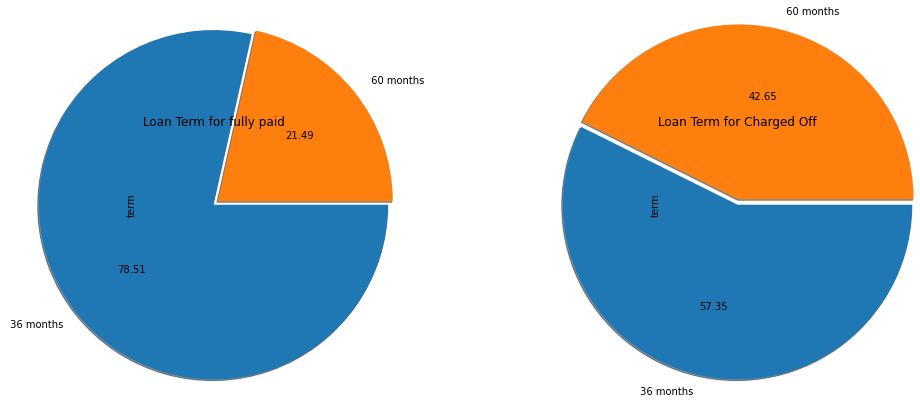

The above plot reveals to us that the borrowers who take loan for a long term, are more likely to charged off, rounding nearly 42.7%. Whereas, the ones who chose shorter-term are less likely to bail on it, summing upto 21.5%.


In [15]:
#Analyzing the term of Loan over Loan Status

plt.figure(figsize=[12,5])
plt.subplot(1,4,1)
G1.get_group('Fully Paid').term.value_counts().plot(kind='pie', shadow=True, explode=[0,0.1], autopct='%.2f', counterclock=False, radius=3, title='Loan Term for fully paid')
#plt.show()


plt.subplot(1,4,4)
G1.get_group('Charged Off').term.value_counts().plot(kind='pie', shadow=True, explode=[0,0.1], autopct='%.2f', counterclock=False, radius=3, title='Loan Term for Charged Off')
plt.show()



print("The above plot reveals to us that the borrowers who take loan for a long term, are more likely to charged off, rounding nearly 42.7%. Whereas, the ones who chose shorter-term are less likely to bail on it, summing upto 21.5%.")

In [16]:
#Analyzing the Verification Status over the status of sanctioned Loan

G1.verification_status.value_counts().unstack().T.plot(kind='bar', stacked=True, figsize=[11,7])
plt.xticks(rotation=45)
plt.title('Verification Status over the status of Loans')
#plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

print("The above plot gives us the information about application who is ‘not verified’ have higher chances of charge-off. Also given the idea, not verified application Frequency is relatively higher high")

The above plot gives us the information about application who is ‘not verified’ have higher chances of charge-off. Also given the idea, not verified application Frequency is relatively higher high


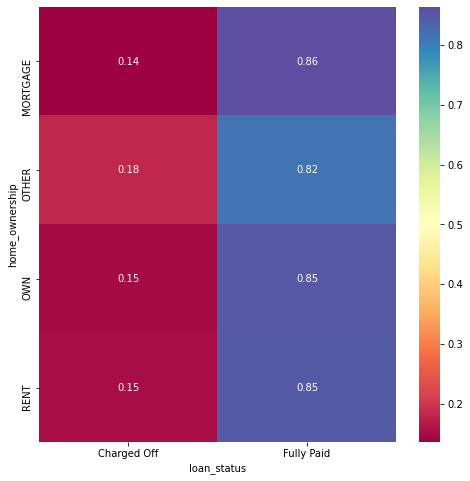

We infer that applicants whose Home Ownership is filled with ‘OTHER’ option are more likely to charge-off.


In [17]:
#Analyzing the Home Ownership Status over the status of sanctioned Loan

plt.figure(figsize=[8,8])
sns.heatmap((G1.home_ownership.value_counts().unstack().T[['Charged Off','Fully Paid']].T/G1.home_ownership.value_counts().unstack().T[['Charged Off','Fully Paid']].T.sum()).T.drop('NONE'), cmap='Spectral', annot=True, fmt='.2f')
plt.show()

print("We infer that applicants whose Home Ownership is filled with ‘OTHER’ option are more likely to charge-off.")

In [18]:
#Analyzing the LC Assigned Grades & Subgrades over the status of sanctioned Loan

plt.figure(figsize=[16,20])

plt.subplot(1,2,1)
sns.heatmap((G1.grade.value_counts().unstack()/G1.grade.value_counts().unstack().sum()).T, cmap='GnBu', annot=True, fmt='.2f')
plt.title('LC Grades over the status of Loans')
plt.xlabel('Loan Status')
plt.ylabel('Grad')

plt.subplot(1,2,2)
sns.heatmap((G1.sub_grade.value_counts().unstack()/G1.sub_grade.value_counts().unstack().sum()).T, cmap='GnBu', annot=True, fmt='.2f')
plt.title('LC Sub-Grades over the status of Loans')
plt.xlabel('Loan Status')
plt.ylabel('Sub-Grad')

plt.show()

print("From the plot, we can say that applicant’s having Grades A-G follow the trend where the borrower is more reliable if he/she is categorized in Grade A, while Grade F being the least reliable. ")

From the plot, we can say that applicant’s having Grades A-G follow the trend where the borrower is more reliable if he/she is categorized in Grade A, while Grade F being the least reliable. 


In [19]:
#Analyzing the Employment Duration over the status of sanctioned Loan

df2.replace('< 1 year','0.5 year', inplace=True)
df2.replace('1 year','01 year', inplace=True)
df2.replace('2 years','02 years', inplace=True)
df2.replace('3 years','03 years', inplace=True)
df2.replace('4 years','04 years', inplace=True)
df2.replace('5 years','05 years', inplace=True)
df2.replace('6 years','06 years', inplace=True)
df2.replace('7 years','07 years', inplace=True)
df2.replace('8 years','08 years', inplace=True)
df2.replace('9 years','09 years', inplace=True)


#plt.figure(figsize=[12,6])
G1.emp_length.value_counts().unstack().T.plot(kind='bar', figsize=[13,7])
plt.title('Employment Duration over the status of Loans')
plt.ylabel('Count')
plt.show()



print("we derive that applicant’s who have more than 10-year experience has more number of loan applications.")

we derive that applicant’s who have more than 10-year experience has more number of loan applications.


In [20]:
#Analyzing the Category of Reason specified by borrower, over the status of sanctioned Loan

plt.figure(figsize=[10,10])
sns.heatmap((G1.purpose.value_counts().unstack()/G1.purpose.value_counts().unstack().sum()).T, cmap='GnBu', annot=True, fmt='.2f')
plt.title('Purpose Specified over the status of Loans')
plt.xlabel('Loan Status')
plt.ylabel('Purpose')

plt.show()

print("The purpose of availing loan is depicted in Plot 2. We observe that applicants whose purpose of applying loan is Small Business, are more likely to charged off, while the one’s applying for purpose of wedding, car, credit card or other major purchases are more likely to repay the entire loan within the given period.")

The purpose of availing loan is depicted in Plot 2. We observe that applicants whose purpose of applying loan is Small Business, are more likely to charged off, while the one’s applying for purpose of wedding, car, credit card or other major purchases are more likely to repay the entire loan within the given period.


In [21]:
#Analyzing the State of Residence of borrower, over the status of sanctioned Loan

G1.addr_state.value_counts().unstack().T
#print("We can say that..............")

loan_status  Charged Off  Fully Paid
addr_state                          
AK                  15.0        63.0
AL                  54.0       381.0
AR                  27.0       208.0
AZ                 123.0       726.0
CA                1125.0      5824.0
CO                  98.0       668.0
CT                  94.0       632.0
DC                  15.0       196.0
DE                  12.0       101.0
FL                 504.0      2277.0
GA                 215.0      1144.0
HI                  28.0       138.0
IA                   NaN         5.0
ID                   1.0         5.0
IL                 197.0      1281.0
IN                   NaN         9.0
KS                  31.0       224.0
KY                  45.0       266.0
LA                  53.0       374.0
MA                 159.0      1138.0
MD                 162.0       861.0
ME                   NaN         3.0
MI                 103.0       601.0
MN                  81.0       524.0
MO                 114.0       556.0
MS                   2.0        17.0
MT                  11.0        72.0
NC                 114.0       636.0
NE                   3.0         2.0
NH                  25.0       141.0
NJ                 278.0      1512.0
NM                  30.0       153.0
NV                 108.0       371.0
NY                 495.0      3203.0
OH                 155.0      1023.0
OK                  40.0       247.0
OR                  71.0       364.0
PA                 180.0      1288.0
RI                  25.0       169.0
SC                  66.0       393.0
SD                  12.0        50.0
TN                   2.0        15.0
TX                 316.0      2343.0
UT                  40.0       212.0
VA                 177.0      1192.0
VT                   6.0        47.0
WA                 127.0       691.0
WI                  63.0       377.0
WV                  21.0       151.0
WY                   4.0        76.0

In [22]:
#We omit the lesser/Not important features such as last_pymnt_d, earliest_cr_line, zip_code, last_credit_pull_d, revol_util, 
#desc, title & emp_title due to the fact that there isn't much variance in the dataset, and presence of large number of categories

In [23]:
# Other Categorical Columns (interpreted as numeric)

'''for i,e in enumerate(['inq_last_6mths','pub_rec_bankruptcies','delinq_2yrs','pub_rec']):
    #plt.subplot(1,4,i+1)
    G1[e].value_counts().unstack().T.plot(kind='barh', stacked=True)
plt.show()'''

"for i,e in enumerate(['inq_last_6mths','pub_rec_bankruptcies','delinq_2yrs','pub_rec']):\n    #plt.subplot(1,4,i+1)\n    G1[e].value_counts().unstack().T.plot(kind='barh', stacked=True)\nplt.show()"

## 3.2 Data Analysis - On Numeric Variables

In [24]:
# Analyzing the Numerical Vairbales with Histograms

c=[]
r=['inq_last_6mths','inq_last_6mths','pub_rec_bankruptcies','delinq_2yrs','pub_rec']
for i in df2.select_dtypes('float64').columns:
    c.append(i)
for i in df2.select_dtypes('int64').columns:
    c.append(i)
c = [e for e in c if e not in r]

nCV=pd.DataFrame(c, columns=['Numeric Vairables'])
nc=4
nr=5
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=[16,12])
for i,e in enumerate(list(np.array(nCV.values).flatten())[:-1]):
    sns.histplot(data=df2[[e,'loan_status']], x=e, kde=True, hue='loan_status', bins=20, ax=axes[i//nc, i%nc])
    plt.tight_layout() 
plt.show()

print("The above plot represents the same information, with the addition of the most representative value plotted on a heatmap.")

C:\Users\yasse\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\yasse\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


The above plot represents the same information, with the addition of the most representative value plotted on a heatmap.


In [25]:
# Analyzing the Numerical Vairbales

nc=4
nr=5
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=[16,12])
for i,e in enumerate(list(np.array(nCV.values).flatten())[:-1]):
    sns.boxplot(data=df2[[e,'loan_status']],x='loan_status', y=e, ax=axes[i//nc, i%nc])
    plt.tight_layout() 
plt.show()

print("The above plot represents the same information, with the addition of the most representative value plotted on a boxplot.")

The above plot represents the same information, with the addition of the most representative value plotted on a boxplot.


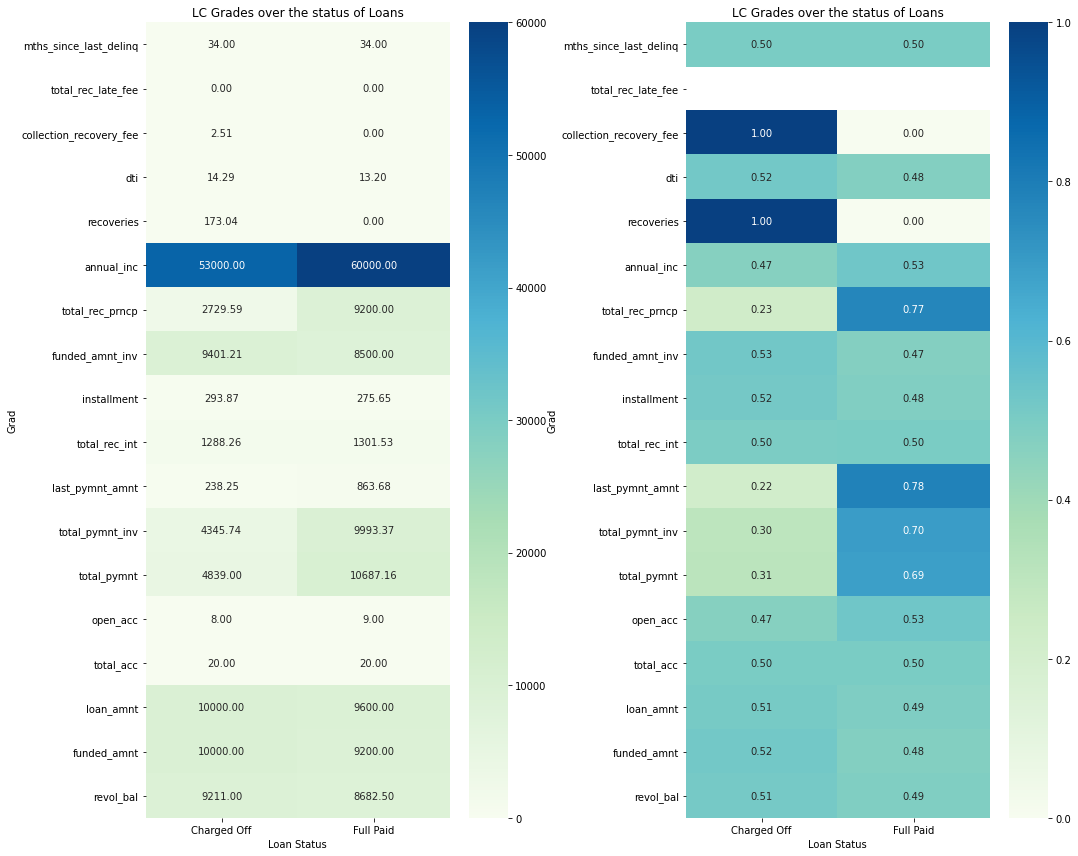

It is evident that some variables play a major role in distinguishing the defaulters from the rest, which include – ‘Last total payment amount received’, ‘Principal received to date’, ‘Payments received to date for total amount funded’, & ‘Payments received to date for the portion of total amount funded by investors’.


In [26]:
a=[];b=[];c=[]
for i,e in enumerate(list(np.array(nCV.values).flatten())[:-1]):
    a.append(e)
    b.append(G1[e].median()[0])
    c.append(G1[e].median()[1])
#pd.DataFrame(a,b,c)
A={'a':a,'Charged Off':b,'Full Paid':c}

plt.figure(figsize=[15,12])

#sns.heatmap(pd.DataFrame(A).set_index('a'), cmap='GnBu', annot=True)
#plt.show()

plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(A).set_index('a'), cmap='GnBu', annot=True, fmt='.2f')
plt.title('LC Grades over the status of Loans')
plt.xlabel('Loan Status')
plt.ylabel('Grad')
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap((pd.DataFrame(A).set_index('a').T/pd.DataFrame(A).set_index('a').T.sum()).T, cmap='GnBu', annot=True, fmt='.2f')
plt.title('LC Grades over the status of Loans')
plt.xlabel('Loan Status')
plt.ylabel('Grad')
plt.tight_layout()

plt.show()

print("It is evident that some variables play a major role in distinguishing the defaulters from the rest, which include – ‘Last total payment amount received’, ‘Principal received to date’, ‘Payments received to date for total amount funded’, & ‘Payments received to date for the portion of total amount funded by investors’.")

<Figure size 2160x2160 with 0 Axes>

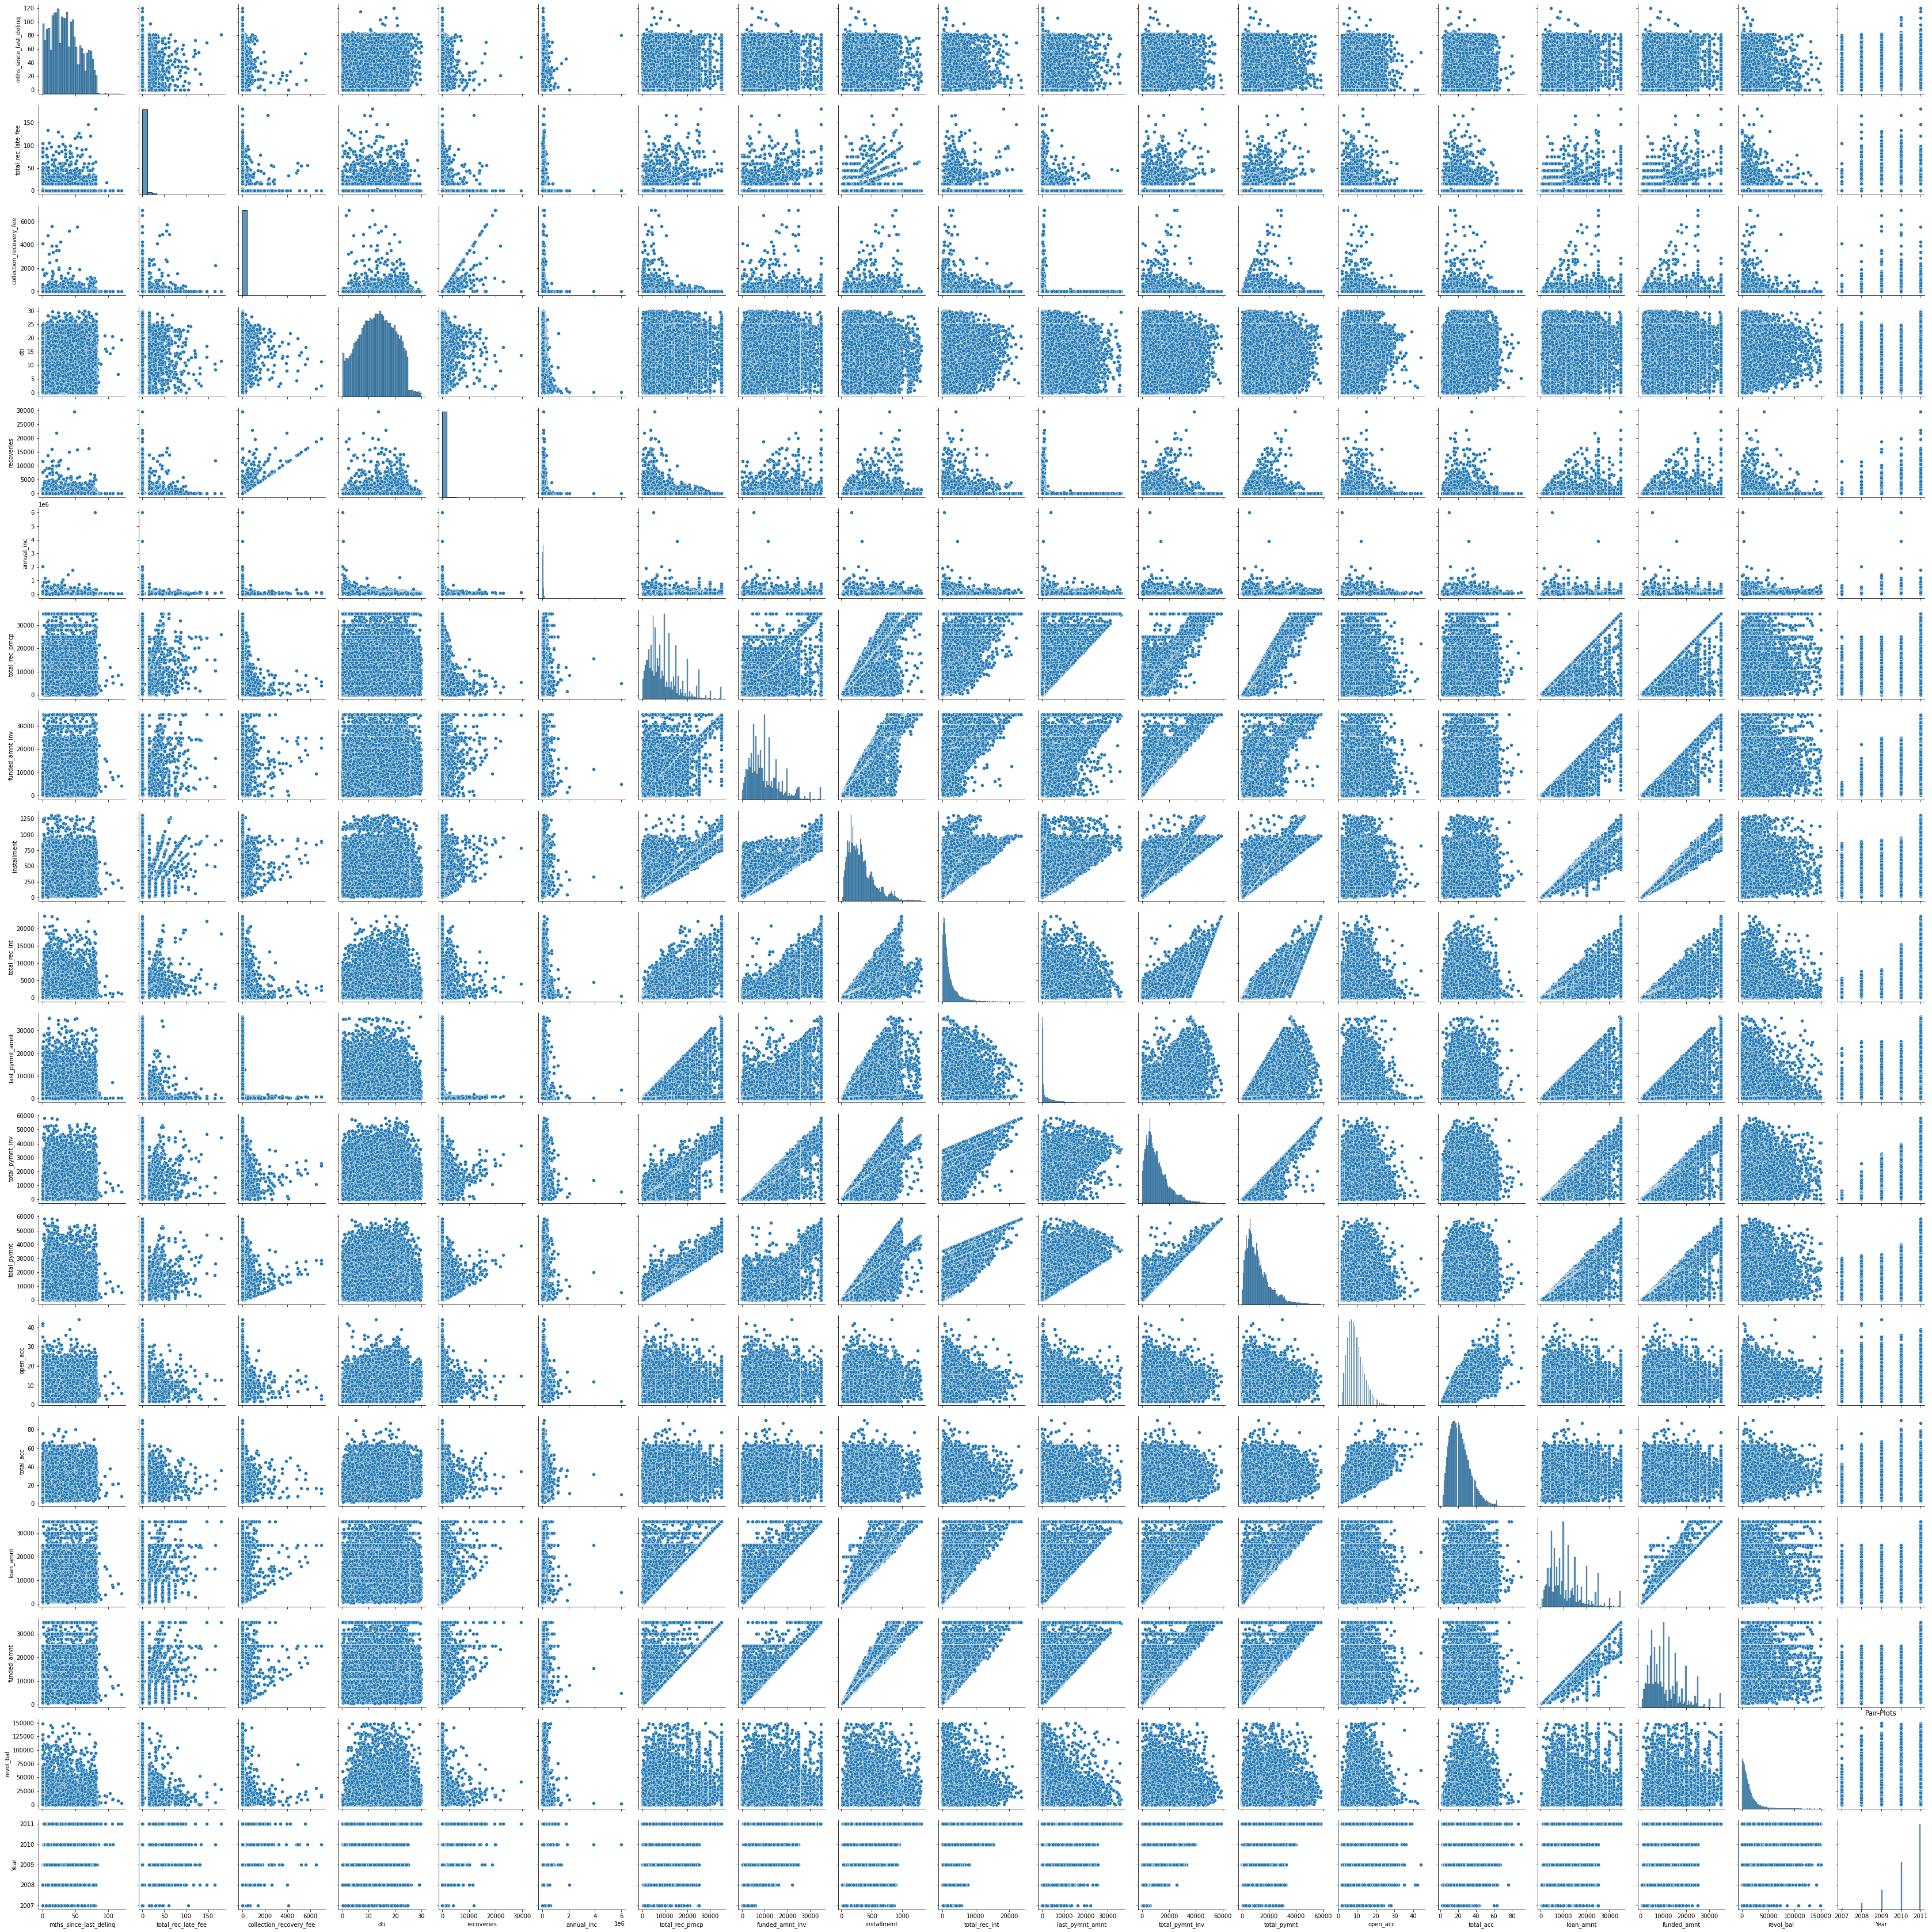

The above plot represents the relationship between the numeric variables. It is evident that most of the features are positively correlated with each other, depicting a directly proportional relationship.This would help us in the analysis, by which we can conclude on the fact that performing analysis on few strongly correlated variables, is sufficient to provide reliable insights.


In [27]:
#Analyzing the relationship between the variables

plt.figure(figsize=[30,30])
sns.pairplot(df2[list(np.array(nCV.values).flatten())])
plt.savefig('Pairplot.png')
plt.title('Pair-Plots')
plt.show()

print("The above plot represents the relationship between the numeric variables. It is evident that most of the features are positively correlated with each other, depicting a directly proportional relationship.This would help us in the analysis, by which we can conclude on the fact that performing analysis on few strongly correlated variables, is sufficient to provide reliable insights.")

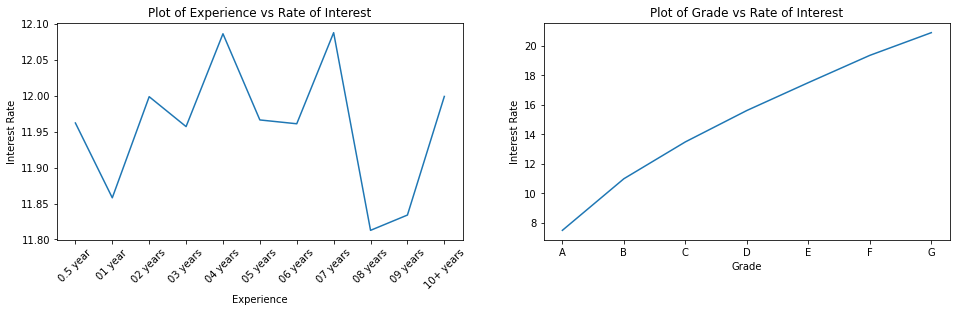

Plot 1 shows the relationship between the applicant’s work-experience vs the applicable rate of interest (ROI). It is evident that ROI follows near normal distribution. Generally applicants having around 4 to 6 years are charged higher ROI of around 12%, while others are charged relatively lesser.

Plot 2 depicts the dependency with ROI with respect to Grades assigned. It is clear that applicant’s grades that range from A to G, are levied with increased ROI in the specified alphabetical order.


In [28]:
#Analyzing the interest rate w.r.t experience

if df2.int_rate.dtype != 'float64':
    df2.int_rate=df2.int_rate.str.strip('%').astype('float')

l=['01 year', '10+ years', '02 years', '03 years', '04 years', '05 years','06 years', '07 years', '08 years', '09 years', '0.5 year']
v=df2.groupby('emp_length').int_rate.mean().values
D={}

plt.figure(figsize=[16,4])
for i in range(len(df2.groupby('emp_length').int_rate.mean().values)):
    D[l[i]] = v[i]
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(D.values(), D.keys(), columns=['Interest Rates']).sort_index())
plt.title("Plot of Experience vs Rate of Interest")
plt.xlabel("Experience")
plt.ylabel("Interest Rate")
plt.xticks(rotation=45)
#plt.show()

#Analyzing the interest rate w.r.t Grades
plt.subplot(1,2,2)
df2.groupby('grade')['int_rate'].median().plot()
plt.title("Plot of Grade vs Rate of Interest")
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

print("Plot 1 shows the relationship between the applicant’s work-experience vs the applicable rate of interest (ROI). It is evident that ROI follows near normal distribution. Generally applicants having around 4 to 6 years are charged higher ROI of around 12%, while others are charged relatively lesser.")
print("\nPlot 2 depicts the dependency with ROI with respect to Grades assigned. It is clear that applicant’s grades that range from A to G, are levied with increased ROI in the specified alphabetical order.")

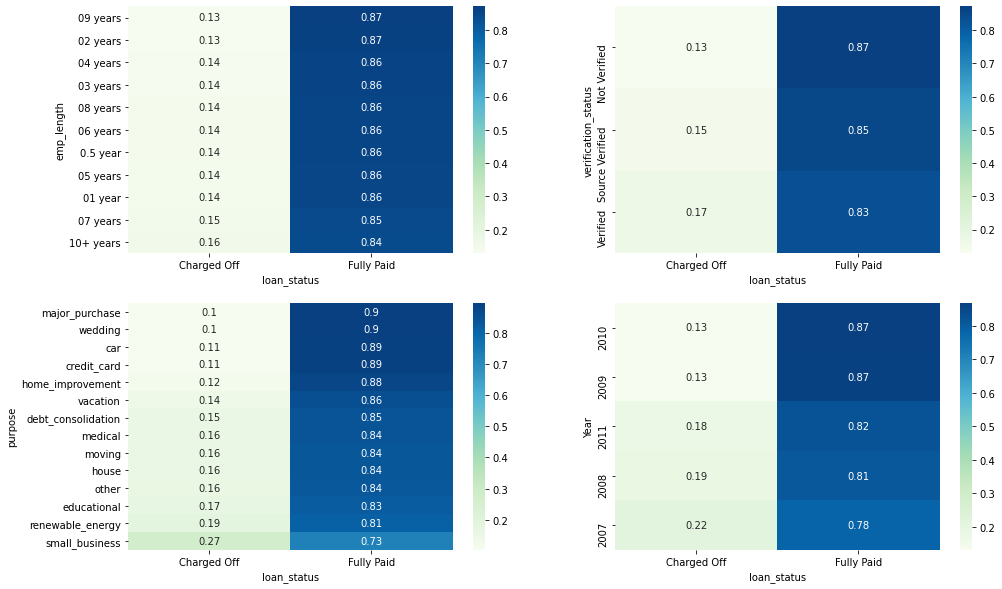

In [29]:
#Analyzing the preferred range to give valuable insights.

plt.figure(figsize=[16,10])
plt.subplot(2,2,1)
sns.heatmap((G1.emp_length.value_counts().unstack()/G1.emp_length.value_counts().unstack().sum()).T.sort_values(by='Fully Paid', ascending=False), annot=True,cmap='GnBu')
plt.subplot(2,2,2)
sns.heatmap((G1.verification_status.value_counts().unstack()/G1.verification_status.value_counts().unstack().sum()).T, annot=True,cmap='GnBu')
plt.subplot(2,2,3)
sns.heatmap((G1.purpose.value_counts().unstack()/G1.purpose.value_counts().unstack().sum()).T.sort_values(by='Fully Paid', ascending=False), annot=True,cmap='GnBu')
plt.subplot(2,2,4)
sns.heatmap((df2.groupby(['Year','loan_status']).funded_amnt.sum().unstack().T/df2.groupby(['Year','loan_status']).funded_amnt.sum().unstack().T.sum()).T.sort_values(by='Fully Paid', ascending=False), annot=True,cmap='GnBu')
plt.show()

### Conclusions:

Based on detailed analysis, the following Strategies are recommended for Lending Club, in order to minimize the risks involved in lending loans & to  maximize their profitability
* Encourage Short Term Loans.
* Applicants with ‘Others’ as their home ownership are more risky, as they have bad payment records.
* Almost all experience levels curb the same full payment likelihood. 
* Loans assigned for the purpose of Small Business bring are to be avoided as much as possible, rather approve prompt on Major Purchases, Wedding, Car, Credit Card, etc.
* Best suitable grades of the applicant can be C, D & E.
* Lending to a ‘non-verified’ applicant can be encouraged, based on its high frequency and low charge-off ratio.
* Lastly, it is recommended to levy an optimal interest rate of around 12.5%. Higher interest increases the probability of defaulting, & lower rates reduce the risk, but also profitability is affected.

<<<--------------------------------------------------------THE END--------------------------------------------------------->>>